In [142]:
import numpy as np
from torch.nn import Sequential, Conv2d, LazyLinear, BatchNorm2d, ReLU, Flatten, Softmax, MaxPool2d
import torch
import detection_and_metrics
import matplotlib.patches as patches

In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
data = np.load('tests/00_unittest_classifier_input/train_data.npz')
X = data['X'].reshape(-1, 1, 40, 100)   #pytorch dimensions are (N, C, H, W)
y = data['y'].astype(np.int64)

In [75]:
X.shape

(1050, 1, 40, 100)

In [76]:
y.shape

(1050,)

In [77]:
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [78]:
h, w, c = 40, 100, 1

In [79]:
model = Sequential(
        Conv2d(in_channels=c, out_channels=32, kernel_size=3),
        BatchNorm2d(32),
        ReLU(),
        MaxPool2d(kernel_size=2),

        Conv2d(in_channels=32, out_channels=64, kernel_size=3),
        BatchNorm2d(64),
        ReLU(),
        MaxPool2d(kernel_size=2),

        Conv2d(in_channels=64, out_channels=128, kernel_size=3),
        BatchNorm2d(128),
        ReLU(),

        Flatten(),
        LazyLinear(2),
        Softmax(dim=1)
    )

C:\ProgramData\Python3_64\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [80]:
target_shape = model[:-5](torch.from_numpy(X)).shape

In [81]:
f = model(torch.from_numpy(X))#

In [82]:
f.shape

torch.Size([1050, 2])

In [83]:
cropped_model = Sequential(
        Conv2d(in_channels=c, out_channels=32, kernel_size=3),
        BatchNorm2d(32),
        ReLU(),
        MaxPool2d(kernel_size=2),

        Conv2d(in_channels=32, out_channels=64, kernel_size=3),
        BatchNorm2d(64),
        ReLU(),
        MaxPool2d(kernel_size=2),

        Conv2d(in_channels=64, out_channels=128, kernel_size=3),
        BatchNorm2d(128),
        ReLU(),
    
        Conv2d(in_channels=128, out_channels=2, kernel_size=(6, 21))    
)

In [84]:
target_shape

torch.Size([1050, 128, 6, 21])

In [85]:
# cropped_model.train()
cropped_model[-1].weight.data = model[-2].weight.data.reshape(2, target_shape[1], target_shape[2], target_shape[3]) #(2, 128, 6, 21)#[...]

In [86]:
model[-2].weight.data

tensor([[ 0.0075, -0.0003, -0.0024,  ...,  0.0003, -0.0033,  0.0047],
        [ 0.0009,  0.0014,  0.0051,  ...,  0.0074,  0.0058,  0.0014]])

In [87]:
cropped_model[-1].bias.data

tensor([-0.0051,  0.0007])

In [88]:
list(cropped_model[-1].parameters())[0].shape

torch.Size([2, 128, 6, 21])

In [89]:
# list(cropped_model[-1].parameters())[0] = list(model[-2].parameters())[0].reshape(2, 128, 6, 21)

In [90]:
# list(cropped_model[-1].parameters())#[1]#.shape

In [91]:
# list(model[-2].parameters())[0].reshape(2, 128, 6, 21)

In [92]:
def get_sizes(h, w):
    src_size = np.array((h, w))
    ker_1 = np.array([3,3])
    ker_2 = np.array([6, 21])
    size_1 = src_size - ker_1 + 1
    size_2 = size_1//2 - ker_1 + 1
    size_3 = size_2//2 - ker_1 + 1
    size_4 = size_3 - ker_2 + 1
    return size_1, size_2, size_3, size_4

In [93]:
for i in range(0, 220):
    print(i, get_sizes(i, 370)[-1][0])

0 -9
1 -9
2 -8
3 -8
4 -8
5 -8
6 -7
7 -7
8 -7
9 -7
10 -6
11 -6
12 -6
13 -6
14 -5
15 -5
16 -5
17 -5
18 -4
19 -4
20 -4
21 -4
22 -3
23 -3
24 -3
25 -3
26 -2
27 -2
28 -2
29 -2
30 -1
31 -1
32 -1
33 -1
34 0
35 0
36 0
37 0
38 1
39 1
40 1
41 1
42 2
43 2
44 2
45 2
46 3
47 3
48 3
49 3
50 4
51 4
52 4
53 4
54 5
55 5
56 5
57 5
58 6
59 6
60 6
61 6
62 7
63 7
64 7
65 7
66 8
67 8
68 8
69 8
70 9
71 9
72 9
73 9
74 10
75 10
76 10
77 10
78 11
79 11
80 11
81 11
82 12
83 12
84 12
85 12
86 13
87 13
88 13
89 13
90 14
91 14
92 14
93 14
94 15
95 15
96 15
97 15
98 16
99 16
100 16
101 16
102 17
103 17
104 17
105 17
106 18
107 18
108 18
109 18
110 19
111 19
112 19
113 19
114 20
115 20
116 20
117 20
118 21
119 21
120 21
121 21
122 22
123 22
124 22
125 22
126 23
127 23
128 23
129 23
130 24
131 24
132 24
133 24
134 25
135 25
136 25
137 25
138 26
139 26
140 26
141 26
142 27
143 27
144 27
145 27
146 28
147 28
148 28
149 28
150 29
151 29
152 29
153 29
154 30
155 30
156 30
157 30
158 31
159 31
160 31
161 31
162 32
163 32
16

In [94]:
for j in range(0, 370):
    print(j, get_sizes(220, j)[-1][1])

0 -24
1 -24
2 -23
3 -23
4 -23
5 -23
6 -22
7 -22
8 -22
9 -22
10 -21
11 -21
12 -21
13 -21
14 -20
15 -20
16 -20
17 -20
18 -19
19 -19
20 -19
21 -19
22 -18
23 -18
24 -18
25 -18
26 -17
27 -17
28 -17
29 -17
30 -16
31 -16
32 -16
33 -16
34 -15
35 -15
36 -15
37 -15
38 -14
39 -14
40 -14
41 -14
42 -13
43 -13
44 -13
45 -13
46 -12
47 -12
48 -12
49 -12
50 -11
51 -11
52 -11
53 -11
54 -10
55 -10
56 -10
57 -10
58 -9
59 -9
60 -9
61 -9
62 -8
63 -8
64 -8
65 -8
66 -7
67 -7
68 -7
69 -7
70 -6
71 -6
72 -6
73 -6
74 -5
75 -5
76 -5
77 -5
78 -4
79 -4
80 -4
81 -4
82 -3
83 -3
84 -3
85 -3
86 -2
87 -2
88 -2
89 -2
90 -1
91 -1
92 -1
93 -1
94 0
95 0
96 0
97 0
98 1
99 1
100 1
101 1
102 2
103 2
104 2
105 2
106 3
107 3
108 3
109 3
110 4
111 4
112 4
113 4
114 5
115 5
116 5
117 5
118 6
119 6
120 6
121 6
122 7
123 7
124 7
125 7
126 8
127 8
128 8
129 8
130 9
131 9
132 9
133 9
134 10
135 10
136 10
137 10
138 11
139 11
140 11
141 11
142 12
143 12
144 12
145 12
146 13
147 13
148 13
149 13
150 14
151 14
152 14
153 14
154 15
155 15


In [95]:
for x in range(69):
    start = x*4
    end = 100 + start
    print(x, start, end)

0 0 100
1 4 104
2 8 108
3 12 112
4 16 116
5 20 120
6 24 124
7 28 128
8 32 132
9 36 136
10 40 140
11 44 144
12 48 148
13 52 152
14 56 156
15 60 160
16 64 164
17 68 168
18 72 172
19 76 176
20 80 180
21 84 184
22 88 188
23 92 192
24 96 196
25 100 200
26 104 204
27 108 208
28 112 212
29 116 216
30 120 220
31 124 224
32 128 228
33 132 232
34 136 236
35 140 240
36 144 244
37 148 248
38 152 252
39 156 256
40 160 260
41 164 264
42 168 268
43 172 272
44 176 276
45 180 280
46 184 284
47 188 288
48 192 292
49 196 296
50 200 300
51 204 304
52 208 308
53 212 312
54 216 316
55 220 320
56 224 324
57 228 328
58 232 332
59 236 336
60 240 340
61 244 344
62 248 348
63 252 352
64 256 356
65 260 360
66 264 364
67 268 368
68 272 372


In [96]:
cr_f = cropped_model(torch.from_numpy(X))

In [97]:
cr_f.shape

torch.Size([1050, 2, 1, 1])

In [98]:
del f

In [99]:
flatten = torch.flatten(cr_f, start_dim = 2, end_dim = 3)

In [100]:
flatten[:10]

tensor([[[ 0.8820],
         [-0.0254]],

        [[ 0.2909],
         [ 0.1289]],

        [[ 0.0115],
         [-0.0325]],

        [[ 0.2368],
         [ 0.1047]],

        [[ 0.3632],
         [ 0.0788]],

        [[ 0.3094],
         [-0.4194]],

        [[ 0.2951],
         [ 0.0324]],

        [[ 0.1693],
         [-0.1467]],

        [[ 0.1271],
         [ 0.3822]],

        [[ 0.2489],
         [ 0.3641]]], grad_fn=<SliceBackward0>)

In [101]:
mask = np.argmax(flatten.detach().numpy(), axis = 1).flatten()

In [102]:
mask[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [103]:
indices = np.arange(flatten.shape[0])

In [104]:
h,w = 50, len(indices)//50

In [105]:
h,w

(50, 21)

In [106]:
indices[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [107]:
indices[mask == 1].shape

(595,)

In [108]:
conf = flatten.detach().numpy()[mask == 1]
conf

array([[[ 0.12707174],
        [ 0.38224617]],

       [[ 0.24892253],
        [ 0.36414343]],

       [[ 0.25721118],
        [ 0.32866418]],

       ...,

       [[ 0.23160666],
        [ 0.3434031 ]],

       [[-0.08584546],
        [ 0.1344986 ]],

       [[ 0.03424911],
        [ 0.78232205]]], dtype=float32)

In [109]:
conf[:, 1, :]

array([[ 0.38224617],
       [ 0.36414343],
       [ 0.32866418],
       [ 0.36867765],
       [ 0.08281457],
       [ 0.12306782],
       [ 0.5448822 ],
       [ 0.2818706 ],
       [ 0.33299932],
       [ 0.3805498 ],
       [ 0.68809927],
       [ 0.43979153],
       [ 0.04953443],
       [ 0.5293007 ],
       [ 0.07139396],
       [ 0.10529914],
       [ 0.68287855],
       [-0.27254808],
       [ 0.35056874],
       [ 0.4069446 ],
       [ 0.31716186],
       [ 0.21424958],
       [ 0.3893004 ],
       [-0.03494005],
       [ 0.9750234 ],
       [-0.4039729 ],
       [ 0.31763393],
       [ 0.00720371],
       [ 0.8143359 ],
       [ 0.03347662],
       [ 0.2791208 ],
       [ 0.32315555],
       [ 0.3796445 ],
       [ 0.46343076],
       [ 0.0785576 ],
       [ 0.41121924],
       [ 0.63479763],
       [ 0.48941207],
       [ 0.06058387],
       [ 0.73130655],
       [ 0.2638416 ],
       [-0.07574823],
       [-0.07951686],
       [ 0.18656145],
       [-0.06850898],
       [ 0

In [110]:
import matplotlib.pyplot as plt

In [111]:
pred_bbox = {"img1": np.array([[8, 112, 40, 100, 0.4083907],
                                [56, 108, 40, 100, 0.40634221],
                                [4, 20, 40, 100, 0.40198728],
                                [68, 24, 40, 100, 0.4007026],
                                [64, 160, 40, 100, 0.42576572],
                                [16, 12, 40, 100, 0.4111293],
                                [12, 16, 40, 100, 0.42142084],
                                [60, 36, 40, 100, 0.41478667]])}
true_bbox = {"img1": [[69, 68, 40, 100],
                          [62, 31, 40, 100],
                          [61, 137, 40, 100]]}

auc = detection_and_metrics.calc_auc(pred_bbox, true_bbox)

In [112]:
print(auc)
0.528

0.5277777777777777


0.528

In [113]:
import common

In [114]:
data_pth = 'tests/04_unittest_detector_input/test_imgs/'
gt_pth = 'tests/04_unittest_detector_input/true_detections.json' 

In [115]:
common.calc_detector_auc(data_pth, gt_pth)

0.020254684126972

In [116]:
data = common.read_for_detection(data_pth, gt_pth)

In [130]:
from PIL import Image, ImageDraw

In [236]:
test_img = 'tests/04_unittest_detector_input/test_imgs/test-0.png'
imgs_dir = 'tests/04_unittest_detector_input/test_imgs/'
img = Image.open(test_img)

In [119]:
img.show()

In [255]:
def predict(images_detection, apply_nms = False):
    cls_model = torch.load('classifier_model.pth')
    detection_model = detection_and_metrics.get_detection_model(cls_model)
    images_detection_no_answer = {}
    images_detection_only_bboxes = {}
    for img_name, data in images_detection.items():
        images_detection_no_answer[img_name] = data[0]
        images_detection_only_bboxes[img_name] = data[1]
    pred = detection_and_metrics.get_detections(detection_model, images_detection_no_answer)
    if apply_nms:
        pred = detection_and_metrics.nms(pred)
    return pred, images_detection_only_bboxes

In [267]:
pred,gt = predict(data)

In [268]:
# pred

In [269]:
best = pred['test-0.png'][np.argsort(pred['test-0.png'][:,-1])[-1]]

In [270]:
best

array([ 52.        ,  34.        ,  40.        , 100.        ,
         0.99999988])

In [271]:
np_img = np.array(img)

In [272]:
np_img.shape

(124, 220)

In [273]:
def sort(bbs):
    return bbs[np.argsort(bbs[:,-1])[::-1]]

In [274]:
sorted_bbs = sort(pred['test-0.png'])

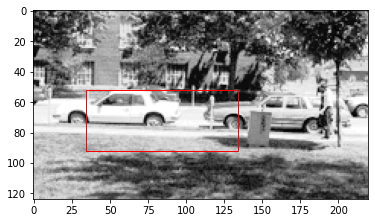

In [275]:
# Create figure and axes
for bb in sorted_bbs[:1]:
    rect = patches.Rectangle((bb[1], bb[0]), bb[3], bb[2], linewidth=1, edgecolor='r', facecolor='none')
    fig, ax = plt.subplots()
    ax.imshow(img, cmap ='gray')
    ax.add_patch(rect)

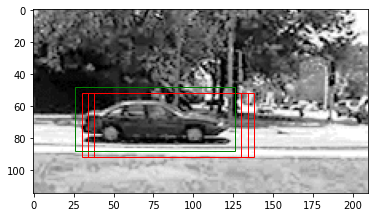

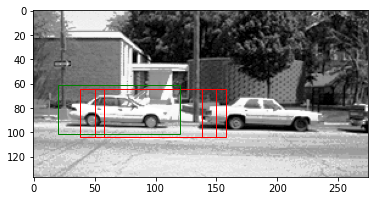

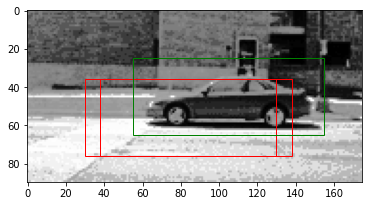

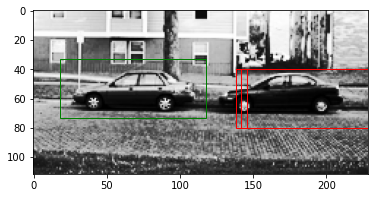

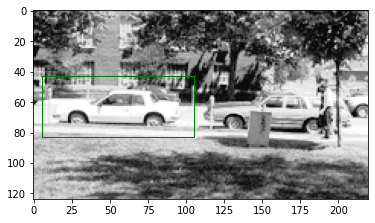

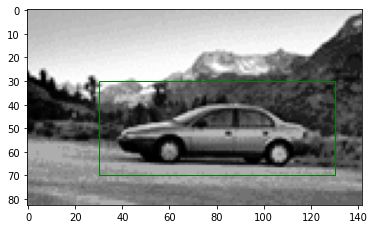

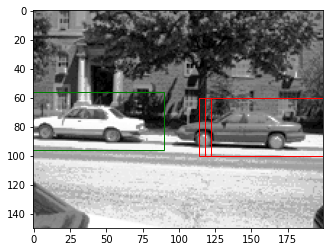

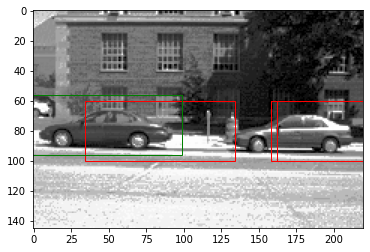

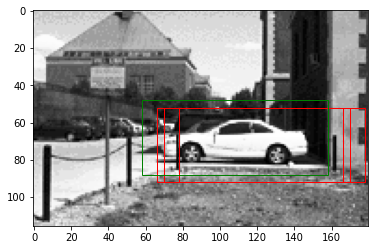

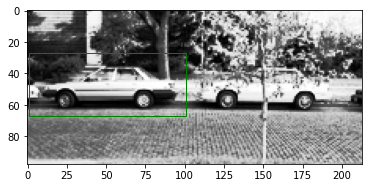

In [277]:
for i in range(10):
    name = f'test-{i}.png'
    img = Image.open(imgs_dir + name)
    np_img = np.array(img)
    sorted_bbs = sort(pred[name])
    fig, ax = plt.subplots()
    for j in range(3):
        bb = sorted_bbs[j]
        rect = patches.Rectangle((bb[1], bb[0]), bb[3], bb[2], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    gt_bb = gt[name][0]
    rect = patches.Rectangle((gt_bb[1], gt_bb[0]), gt_bb[3], gt_bb[2], linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    ax.imshow(img, cmap ='gray')